- Marcellino Mahesa Janitra - 5025201105

In [37]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [38]:
cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [39]:
cancer.target_names # malignant & benign

array(['malignant', 'benign'], dtype='<U9')

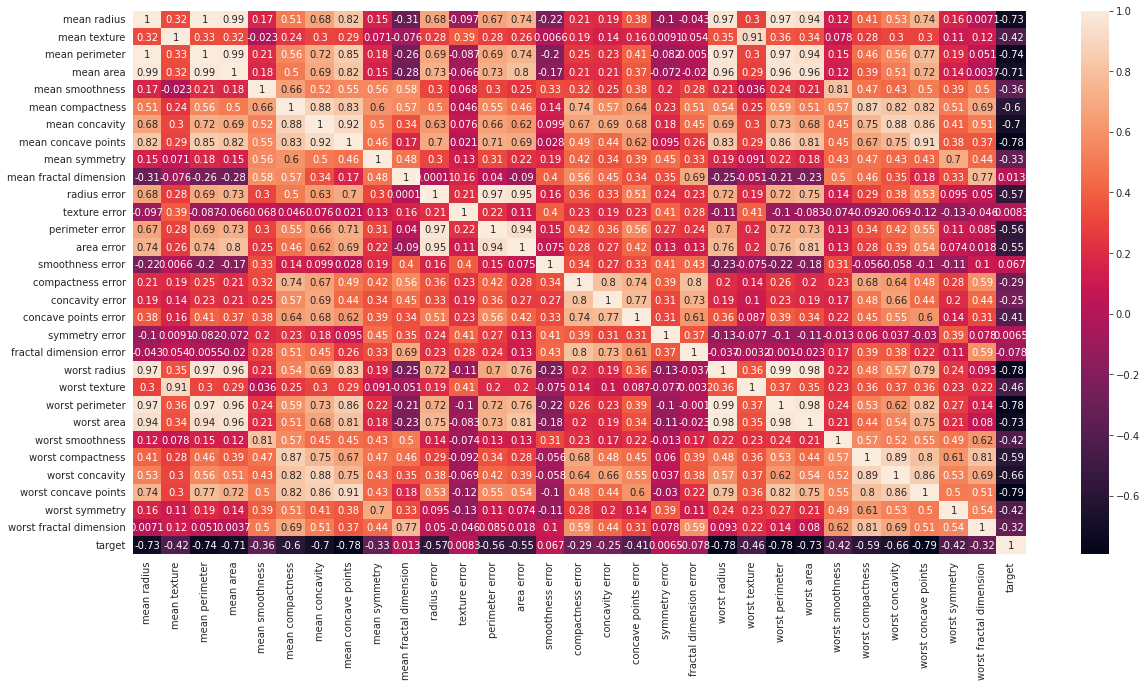

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# Mengecek korelasi antar feature dengan target
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
X = df.drop('target', axis=1)
y = df.target
print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (569, 30)
'y' shape: (569,)


In [46]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    print(f"Test Result: (Train: {train})\n================================================")    
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))    
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    print("")

In [47]:
# Linear SVM
from sklearn.svm import LinearSVC
model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(loss='hinge')

In [48]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Test Result: (Train: True)
Accuracy Score: 89.45%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.990826    0.858131  0.894472    0.924479      0.907808
recall       0.724832    0.995984  0.894472    0.860408      0.894472
f1-score     0.837209    0.921933  0.894472    0.879571      0.890215
support    149.000000  249.000000  0.894472  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[108  41]
 [  1 248]]


Test Result: (Train: False)
Accuracy Score: 91.23%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   1.000000    0.878049  0.912281    0.939024      0.922978
recall      0.761905    1.000000  0.912281    0.880952      0.912281
f1-score    0.864865    0.935065  0.912281    0.899965      0.909202
support    63.000000  108.000000  0.91

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [49]:
# Polynomial SVM
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


SVC(C=5, coef0=1, degree=2, gamma='auto', kernel='poly')

In [50]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Test Result: (Train: True)
Accuracy Score: 96.98%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.985816    0.961089  0.969849    0.973453      0.970346
recall       0.932886    0.991968  0.969849    0.962427      0.969849
f1-score     0.958621    0.976285  0.969849    0.967453      0.969672
support    149.000000  249.000000  0.969849  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[139  10]
 [  2 247]]


Test Result: (Train: False)
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.967742    0.972477   0.97076    0.970109      0.970733
recall      0.952381    0.981481   0.97076    0.966931      0.970760
f1-score    0.960000    0.976959   0.97076    0.968479      0.970711
support    63.000000  108.000000   0.9

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [51]:
# Radial SVM
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


SVC(C=0.1, gamma=0.5)

In [52]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Test Result: (Train: True)
Accuracy Score: 62.56%
_______________________________________________
CLASSIFICATION REPORT:
             0.0         1.0  accuracy   macro avg  weighted avg
precision    0.0    0.625628  0.625628    0.312814      0.391411
recall       0.0    1.000000  0.625628    0.500000      0.625628
f1-score     0.0    0.769706  0.625628    0.384853      0.481550
support    149.0  249.000000  0.625628  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[  0 149]
 [  0 249]]


Test Result: (Train: False)
Accuracy Score: 63.16%
_______________________________________________
CLASSIFICATION REPORT:
            0.0         1.0  accuracy   macro avg  weighted avg
precision   0.0    0.631579  0.631579    0.315789      0.398892
recall      0.0    1.000000  0.631579    0.500000      0.631579
f1-score    0.0    0.774194  0.631579    0.387097      0.488964
support    63.0  108.000000  0.631579  171.000000    171.000000
___________________

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and

 # penjelasan Hasil
 ## Train:
 prediction dihitung dari X jenis apa, kalau train false predict pakai X_test, kalau true predict pakai X_train

 ## precission
 true positive / (true positive + false positive)

 ## recall
 true positive / (true positive + false negative)

 ## f1-score
 precission * recall / (precission + recall)

 ## support
 berapa target muncul di dataset (in this case kita aliaskan 0 dan 1)

 ## macro average
 menghitung langsung rata-rata (total data/jumlah data

 ## weighted average
 menghitung rata-rata dan memperhatikan proporsi data

 ## Confusion Matrix 
 [True Positive, False Positive]

 [False Negative, True Negative]
